# 1. Decision Boundary

### What is Decision Boudary 
- In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class.

### Important Points
1. We can draw decision boundary for all the classification algorithms including Neural Networks
2. Decision Boundary can be both linear(as in the case of SVM) or non-linear (as in the case of Decision tree classifier or KNN)
3. Decision boundaries are not always clear cut. That is, the transition from one class in the feature space to another is not discontinuous, but gradual. This effect is common in fuzzy logic based classification algorithms, where membership in one class or another is ambiguous.
4. For higher dimension problems the decision boundary acts as a hyperplane(for linear ones)

# 2. Voronoi Diagram

#### In mathematics, a Voronoi diagram is a partition of a plane into regions close to each of a given set of objects. It can be classified also as a tessellation.
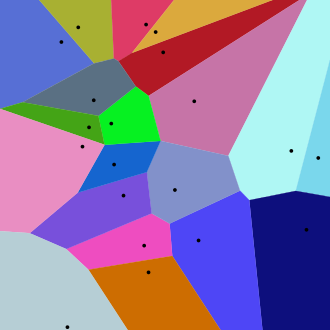

# 3. Steps to plot Decision Boundary for knn(Assuming 2 input cols)

1. Train the classifier on the training set.
2. Create a uniform grid(with the help of Numpy meshgrid) of points that densely cover the region of the input space containing the training set.
3. Classify each points on grid. Store the result in array A, where Aij contains the predicted class for the point at row i,column j on grid.
4. Plot the array as an image, where each pixel correspond to each point and its color represent the predicted class. The decision boundary can be seen as contours where image changes color.
5. Finally print out the training data with their respective color on the same contour

### Example of meshgrid : 

In [12]:
!pip install -U matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/2d/d5/6227732ecab9165586966ccb54301e3164f61b470c954c4cf6940654fbe1/matplotlib-3.8.4-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/7.7 MB 487.6 kB/s eta 0:00:16
    --------------------------------------- 0.1/7.7 MB 837.8 kB/s eta 0:00:10
   - -------------------------------------- 0.3/7.7 MB 1.6 MB/s eta 0:00:05
   --- ------------------------------------ 0.7/7.7 MB 3.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.5/7.7 MB 5.8 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.7 MB 10.5 MB/s eta 0:00:01
   ---------------------------- ----------- 5.4/7.7 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.7 MB 19.5 MB/s eta 0:00:01
   ------------------------------

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\praye\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [13]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-40,40,100)
y = np.linspace(-50,50,90)

xx,yy = np.meshgrid(x,y)

z = (xx**2) + (yy**2)

C:\Users\praye\AppData\Local\Temp\ipykernel_24772\2079104818.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


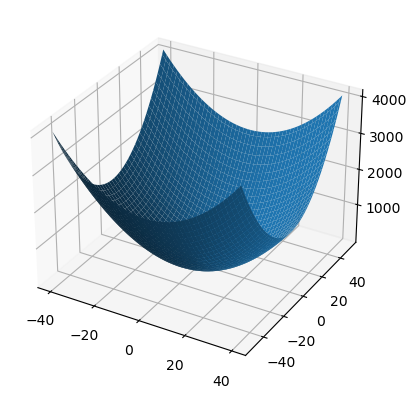

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection= "3d")
surf = ax.plot_surface(xx,yy, z)
fig.show()

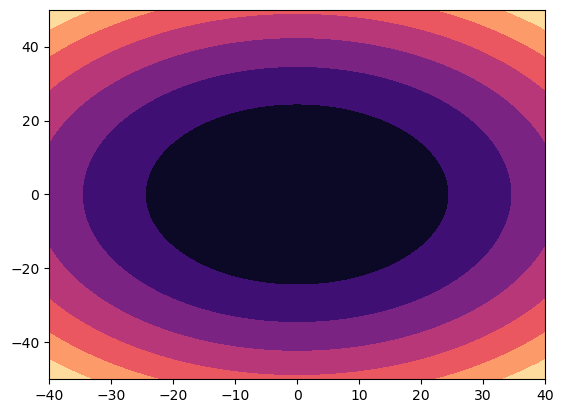

In [23]:
plt.contourf(xx,yy,z,cmap='magma')

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Social_Network_Ads.csv")

df = df.iloc[:,2:]

X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=0)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step 2: Creating a Meshgrid

In [40]:
a = np.arange(start=X_train[:,0].min()-1,stop = X_train[:,0].max()+1,step=0.01)
b = np.arange(start=X_train[:,1].min()-1,stop = X_train[:,1].max()+1,step=0.01)

(592,)

In [43]:
XX,YY = np.meshgrid(a,b)

In [46]:
YY.shape

(592, 609)

### Step 3 : Classify each points on Meshgrid

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

KNeighborsClassifier()

In [51]:
XX[0][1],YY[0][1]

(-2.9554797790006906, -2.5913815646031484)

In [52]:
knn.predict(np.array([-2.9554797790006906, -2.5913815646031484]).reshape(1,2))

array([0], dtype=int64)

In [55]:
input_arr = np.array([XX.ravel(),YY.ravel()]).T

In [56]:
labels = knn.predict(input_arr)

In [58]:
labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### Step 4 : Plotting an array as an image

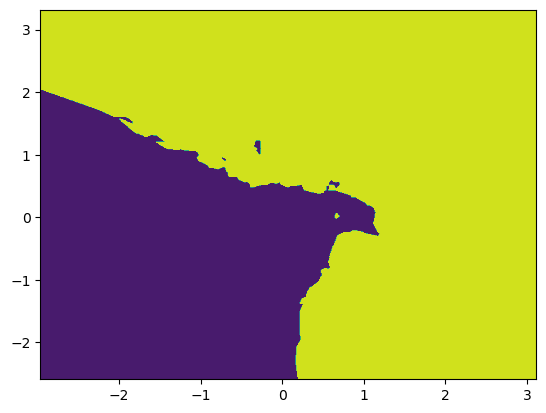

In [60]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

### Step 5 : Plotting all the training data on the plot

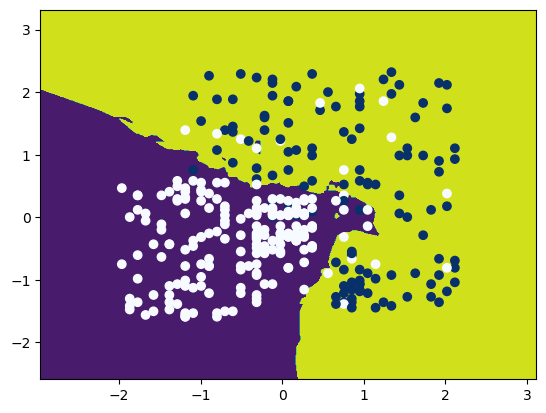

In [67]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='Blues')